In [1]:
# Import relevant items
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline


In [3]:
con = r'E:/RESEAERCH/FEEDS/makidye/feeds.csv'
#con = r'E:/RESEAERCH/FEEDS/mulago/feeds.csv'
#con = r'E:/RESEAERCH/FEEDS/BUgolbi/feeds.csv'

In [4]:
df = pd.read_csv(con, parse_dates = ['created_at'])
print df.head()

           created_at  entry_id  field1  field2  field3  field4       field5  \
0 2017-06-30 21:54:28         1   17.36   23.44   42.72    1.39     0.000000   
1 2017-06-30 21:55:29         2   17.51   23.75   42.05    1.39  1000.000000   
2 2017-06-30 21:56:35         3   17.28   23.30   50.69    1.39     0.358032   
3 2017-06-30 21:57:34         4   16.82   22.56   36.48    1.39     0.357840   
4 2017-06-30 21:58:33         5   16.91   22.57   38.55    1.39     0.357840   

        field6  field7  
0     0.000000     NaN  
1  1000.000000     NaN  
2    32.584686     NaN  
3    32.584671     NaN  
4    32.584671     NaN  


In [136]:
df.describe()

,entry_id,field1,field2,field3,field4,field5,field6,field7
count,187516.000000,187516.000000,187516.000000,187516.000000,187516.000000,187516.000000,187516.000000,187516.000000
mean,93758.500000,25.230763,35.705773,60.715093,1.389950,126.758946,154.860470,3.881131
std,54131.350876,173.971287,242.477315,247.517101,0.002399,332.260039,321.570684,0.444288
min,1.000000,0.000000,0.000000,0.000000,1.230000,0.000000,0.000000,3.150000
25%,46879.750000,4.350000,6.460000,18.500000,1.390000,0.332323,32.570015,3.480000
50%,93758.500000,7.470000,10.760000,30.560000,1.390000,0.337679,32.577187,3.770000
75%,140637.250000,13.810000,19.520000,52.720000,1.390000,0.337705,32.577217,4.290000
max,187516.000000,5747.390000,8682.300000,8741.860000,1.390000,1000.000000,1000.000000,5.000000


In [137]:
df.dtypes

created_at    datetime64[ns]
entry_id               int64
field1               float64
field2               float64
field3               float64
field4               float64
field5               float64
field6               float64
field7               float64
dtype: object

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,8]

In [139]:
# Are there null values in our dataset?
df.isnull().field2.any()

False

In [140]:
# Show rows where any cell has a NaN
df[df.isnull().any(axis=1)].shape

(0, 9)

In [141]:
df = df.dropna(axis=0,subset=['field2'])
df.shape

(187516, 9)

In [142]:
# Are there null values in our dataset?
df.isnull().field2.any()

False

In [143]:
df = df.drop(['field1','field3','field4','field5','field6','field7'], axis=1)

In [144]:
df.head()

,created_at,entry_id,field2
0,2017-07-30 19:42:39,1,31.06
1,2017-07-30 19:43:38,2,30.87
2,2017-07-30 19:44:35,3,32.74
3,2017-07-30 19:45:33,4,33.87
4,2017-07-30 19:46:33,5,35.07


In [145]:
df = df.drop(df[df.field2 <= 0.62].index)

In [146]:
df['field2'].count()

184934

In [147]:
df = df.drop(df[df.field2 >= 1000].index)

In [148]:
df['field2'].count()

183706

In [149]:
# Are there null values in our dataset?
df.isnull().field2.any()

False

In [150]:
df = df.rename(columns={"created_at": "Date"})
df = df.rename(columns={"field2": "Value"})

In [151]:
df.describe()

,entry_id,Value
count,183706.000000,183706.000000
mean,94849.308526,19.963495
std,53962.670904,52.690382
min,1.000000,0.630000
25%,47858.250000,6.580000
50%,95663.500000,10.840000
75%,141589.750000,19.430000
max,187516.000000,999.510000


In [152]:
print df['Value'].var()
print df['Value'].median()
print df['Value'].skew()
print df['Value'].kurt()

2776.27635792
10.84
12.6877540493
190.183723771


In [153]:
def time_series(start, end):
    time_series_df = df[['Date', 'Value']][(df['Date'] >= start) & (df['Date'] <= end)]
    x = time_series_df.Date
    y = time_series_df.Value
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();

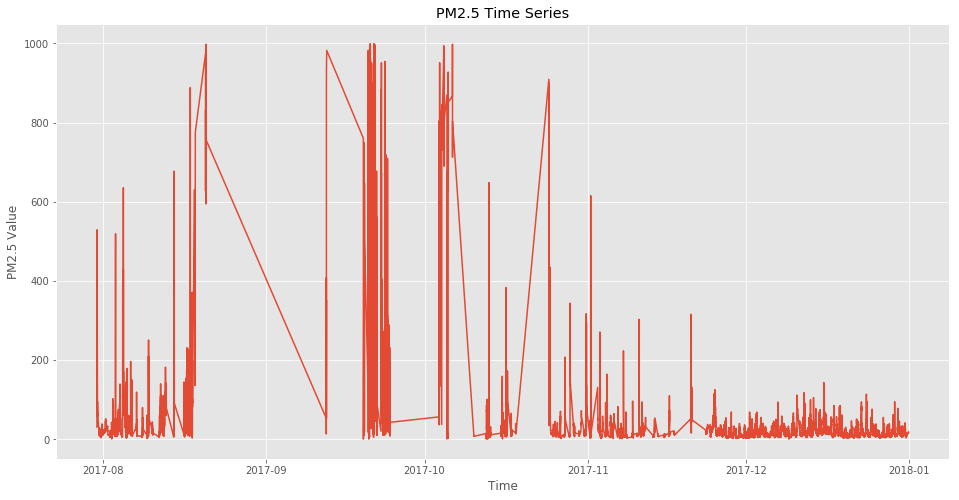

In [154]:
time_series('2017','2018')

In [155]:
#df=df.replace(df['Value'] >500, 500)
#replace values over 550 with 505
df.Value = np.where(df.Value >500, 500,df.Value)

In [156]:
def time_series(start, end):
    time_series_df = df[['Date', 'Value']][(df['Date'] >= start) & (df['Date'] <= end)]
    x = time_series_df.Date
    y = time_series_df.Value
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();

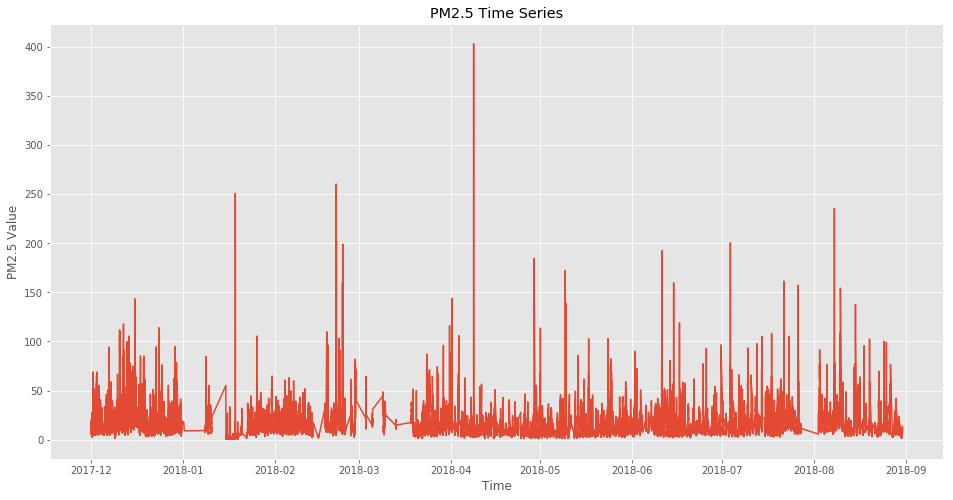

In [157]:
time_series('2017-12-01','2018-09-30')

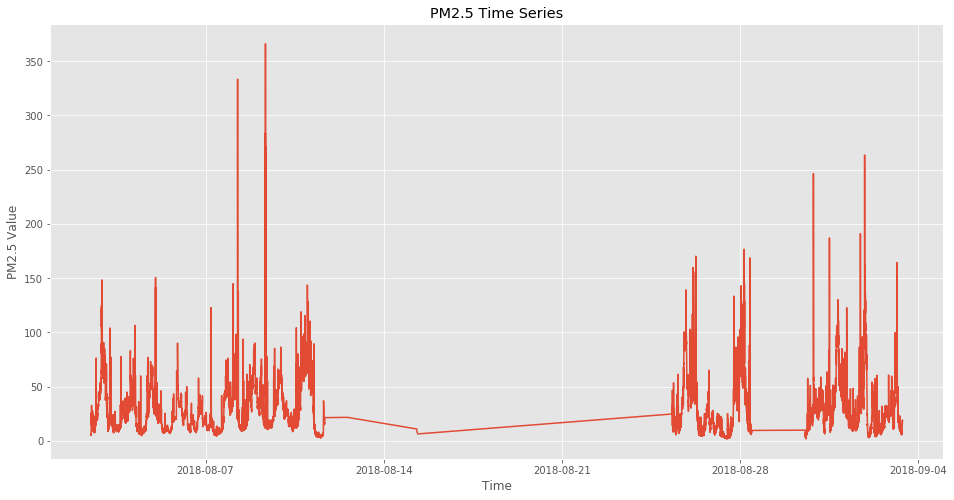

In [29]:
time_series('2018-08-02','2018-09-04')

In [158]:
df.head()

,Date,entry_id,Value
0,2017-07-30 19:42:39,1,31.06
1,2017-07-30 19:43:38,2,30.87
2,2017-07-30 19:44:35,3,32.74
3,2017-07-30 19:45:33,4,33.87
4,2017-07-30 19:46:33,5,35.07


In [159]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [160]:
#Create day of the week feature
import datetime as dt

df['day_week'] = df['Date'].dt.weekday_name

In [161]:
import datetime as dt
#df['Month'] = df['Date'].dt.month_name()

In [162]:
df['month'] = df['Date'].dt.month_name()

In [163]:
df['month_cat'] = df.month.astype("category").cat.codes

In [164]:
df.head()

,Date,entry_id,Value,day_week,month,month_cat
0,2017-07-30 19:42:39,1,31.06,Sunday,July,5
1,2017-07-30 19:43:38,2,30.87,Sunday,July,5
2,2017-07-30 19:44:35,3,32.74,Sunday,July,5
3,2017-07-30 19:45:33,4,33.87,Sunday,July,5
4,2017-07-30 19:46:33,5,35.07,Sunday,July,5


In [165]:
df = df.drop(df[df.Value >= 300].index)

(array([  4.92810114e-02,   2.83075088e-02,   1.15934347e-02,
          4.83594608e-03,   2.03838199e-03,   1.12451106e-03,
          7.08167694e-04,   4.47061713e-04,   3.10474760e-04,
          2.87984539e-04,   2.55072020e-04,   2.11737204e-04,
          1.63465510e-04,   1.45912166e-04,   1.09708396e-04,
          7.84415029e-05,   5.21114880e-05,   4.77231521e-05,
          3.56552286e-05,   3.62037706e-05,   2.85241829e-05,
          2.63300150e-05,   2.68785570e-05,   2.08445952e-05,
          1.91989693e-05,   2.24902211e-05,   1.91989693e-05,
          1.53591754e-05,   9.87375561e-06,   1.15193816e-05]),
 array([   0.63 ,   10.603,   20.576,   30.549,   40.522,   50.495,
          60.468,   70.441,   80.414,   90.387,  100.36 ,  110.333,
         120.306,  130.279,  140.252,  150.225,  160.198,  170.171,
         180.144,  190.117,  200.09 ,  210.063,  220.036,  230.009,
         239.982,  249.955,  259.928,  269.901,  279.874,  289.847,  299.82 ]),
 <a list of 30 Patch objec

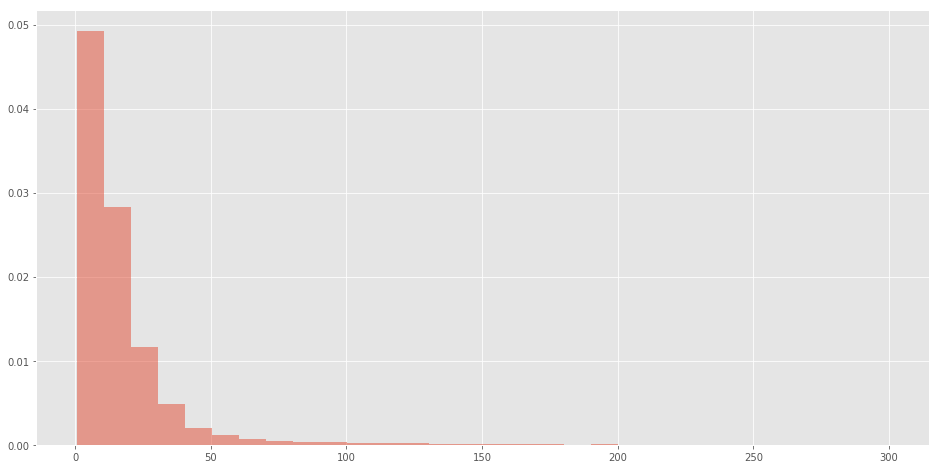

In [166]:
plt.hist(df.Value, bins=30, normed =True, alpha=0.5)

In [167]:
#df.to_csv('E:/RESEAERCH/FEEDS/BUkoto/feedsH.csv',index = True)

In [5]:
con1 = r'E:/RESEAERCH/FEEDS/BUKOTO/feedsH.csv'
df = pd.read_csv(con1, parse_dates = ['Date'])
print df.head()

   Unnamed: 0                Date  entry_id  Value day_week month  month_cat
0      131072 2018-07-24 18:25:20    131073  22.66  Tuesday  July          1
1      131073 2018-07-24 18:26:17    131074  24.96  Tuesday  July          1
2      131074 2018-07-24 18:27:18    131075  22.73  Tuesday  July          1
3      131075 2018-07-24 18:29:16    131076  20.67  Tuesday  July          1
4      131076 2018-07-24 18:30:21    131077  21.75  Tuesday  July          1


C:\Users\Wabinyai\Anaconda2\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


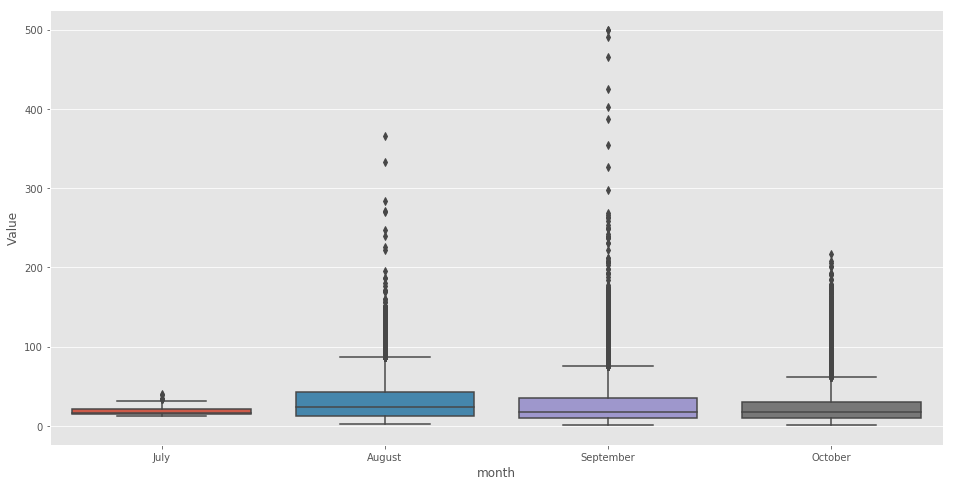

In [6]:
ax = sns.boxplot(x="month", y="Value", data=df)

In [170]:

daily = df.set_index('Date').groupby(pd.Grouper(freq='H'))['Value'].mean()
monthly = daily.groupby(pd.Grouper(freq='H')).mean()
#Dropping all Nan values
monthlys = monthly.dropna(axis=0)
print monthlys.head()
print monthlys.shape

Date
2018-07-24 18:00:00    22.309697
2018-07-24 19:00:00    17.581429
2018-07-24 20:00:00    15.128750
2018-07-24 21:00:00    23.731132
2018-07-24 22:00:00    14.111600
Name: Value, dtype: float64
(773,)


In [171]:

daily = df.set_index('Date').groupby(pd.Grouper(freq='D'))['Value'].mean()
monthly = daily.groupby(pd.Grouper(freq='D')).mean()
#Dropping all Nan values
monthlys = monthly.dropna(axis=0)
print monthlys.head()
print monthlys.shape

Date
2018-07-24    18.376148
2018-08-02    37.143668
2018-08-03    25.512630
2018-08-04    30.081047
2018-08-05    23.409175
Name: Value, dtype: float64
(42,)


In [172]:
#monthlys.to_csv('E:/RESEAERCH/FEEDS/BUKOTO/feedsD.csv',index = True)

# MERGING TWO CSV

In [7]:
#foo = r'E:/RESEAERCH/FEEDS/ENTE/KAMPALA.csv'
foo = r'E:/RESEAERCH/FEEDS/ENTE/methcombine.csv'
foo1 =r'E:/RESEAERCH/FEEDS/makidye/feedsD.csv'
#foo1 =r'E:/RESEAERCH/FEEDS/BUKOTO/feedsD.csv'

In [8]:
# Let's first load the data and take a look at what we have.
a = pd.read_csv(foo,parse_dates = ['Date'])
#b = pd.read_csv(foo1, parse_dates = ['Date'])
b = pd.read_csv(foo1)


#b.columns = ['Date', 'Value']
#print dt.head()
b['Date'] = pd.to_datetime(b['Date'])
print b.head()  

   Day       Date      Value
0    1 2017-06-30  43.638864
1    2 2017-01-07  21.086933
2    3 2017-02-07  42.684333
3    4 2017-03-07  30.683978
4    5 2017-04-07  27.477139


In [9]:
a.head()

,Date,Temperature (degrees F),Barometric Pressure (mbar),Wind direction (degrees),Wind speed (mph),Dewpoint (degrees F),Relative Humidity (%)
0,2017-10-15,77.0,1005.840000,200.000000,2.0,65.700000,68.000000
1,2017-10-16,81.5,1005.280000,0.000000,0.0,66.200000,59.000000
2,2017-10-17,78.3,1006.953333,113.333333,2.0,67.466667,69.666667
3,2017-10-18,72.3,1003.380000,0.000000,0.0,68.000000,86.000000
4,2017-10-19,73.4,1007.900000,70.000000,2.5,67.300000,81.000000


In [176]:
#a = a.drop(["Analysis Barometric Pressure (mbar)","Analysis Temperature (degrees F)","Analysis Dewpoint (degrees F)","Analysis Relative Humidity (%)","Analysis Wind speed (mph)","Analysis Wind direction (degrees)"], axis=1)


In [177]:
a.head()

,Date,Temperature (degrees F),Barometric Pressure (mbar),Wind direction (degrees),Wind speed (mph),Dewpoint (degrees F),Relative Humidity (%)
0,2017-10-15,77.0,1005.840000,200.000000,2.0,65.700000,68.000000
1,2017-10-16,81.5,1005.280000,0.000000,0.0,66.200000,59.000000
2,2017-10-17,78.3,1006.953333,113.333333,2.0,67.466667,69.666667
3,2017-10-18,72.3,1003.380000,0.000000,0.0,68.000000,86.000000
4,2017-10-19,73.4,1007.900000,70.000000,2.5,67.300000,81.000000


In [10]:
#a = a.rename(columns={"Time (UTC)": "Date"})
a = a.rename(columns={"Wind direction (degrees)": "DIR"})
a = a.rename(columns={"Temperature (degrees F)": "TEMP"})
a = a.rename(columns={"Dewpoint (degrees F)": "DEWP"})
a = a.rename(columns={"Wind speed (mph)": "SPD"})
a = a.rename(columns={"Relative Humidity (%)": "HUM"})


In [11]:
b.head()


,Day,Date,Value
0,1,2017-06-30,43.638864
1,2,2017-01-07,21.086933
2,3,2017-02-07,42.684333
3,4,2017-03-07,30.683978
4,5,2017-04-07,27.477139


In [12]:
merge = a.merge(b,on='Date')

#df2 = pd.concat([a, b], axis=1, join='inner').sort_index()
print(merge.head())

        Date  TEMP  Barometric Pressure (mbar)         DIR  SPD       DEWP  \
0 2017-10-15  77.0                 1005.840000  200.000000  2.0  65.700000   
1 2017-10-16  81.5                 1005.280000    0.000000  0.0  66.200000   
2 2017-10-17  78.3                 1006.953333  113.333333  2.0  67.466667   
3 2017-10-18  72.3                 1003.380000    0.000000  0.0  68.000000   
4 2017-10-19  73.4                 1007.900000   70.000000  2.5  67.300000   

         HUM  Day     Value  
0  68.000000   96  7.784710  
1  59.000000   97  6.511036  
2  69.666667   98  4.557446  
3  86.000000   99  8.152256  
4  81.000000  100  6.008917  


# MERGING A and B

In [13]:
merge.head()

,Date,TEMP,Barometric Pressure (mbar),DIR,SPD,DEWP,HUM,Day,Value
0,2017-10-15,77.0,1005.840000,200.000000,2.0,65.700000,68.000000,96,7.784710
1,2017-10-16,81.5,1005.280000,0.000000,0.0,66.200000,59.000000,97,6.511036
2,2017-10-17,78.3,1006.953333,113.333333,2.0,67.466667,69.666667,98,4.557446
3,2017-10-18,72.3,1003.380000,0.000000,0.0,68.000000,86.000000,99,8.152256
4,2017-10-19,73.4,1007.900000,70.000000,2.5,67.300000,81.000000,100,6.008917


In [14]:
merge = merge.drop(['Barometric Pressure (mbar)'], axis=1)

In [15]:
merge.head()

,Date,TEMP,DIR,SPD,DEWP,HUM,Day,Value
0,2017-10-15,77.0,200.000000,2.0,65.700000,68.000000,96,7.784710
1,2017-10-16,81.5,0.000000,0.0,66.200000,59.000000,97,6.511036
2,2017-10-17,78.3,113.333333,2.0,67.466667,69.666667,98,4.557446
3,2017-10-18,72.3,0.000000,0.0,68.000000,86.000000,99,8.152256
4,2017-10-19,73.4,70.000000,2.5,67.300000,81.000000,100,6.008917


In [16]:
merge.describe()

,TEMP,DIR,SPD,DEWP,HUM,Day,Value
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,75.170635,135.984848,2.307720,65.000938,71.868326,236.303030,16.126810
std,3.676316,82.150378,1.477480,2.529918,11.871062,83.323904,14.766839
min,65.100000,0.000000,0.000000,53.600000,39.000000,11.000000,1.132140
25%,72.700000,90.000000,1.333333,64.216667,64.875000,172.500000,8.465451
50%,75.133333,140.000000,2.000000,65.550000,72.000000,234.000000,12.066148
75%,77.900000,180.000000,3.000000,66.562500,79.500000,307.500000,19.404278
max,84.000000,360.000000,7.000000,70.200000,100.000000,381.000000,117.918971


In [14]:
import datetime as dt
merge['month'] = merge['Date'].dt.month_name()

In [15]:
merge.head()

,Date,TEMP,DIR,SPD,DEWP,HUM,Day,Value,month
0,2017-10-15,77.0,200.000000,2.0,65.700000,68.000000,96,7.784710,October
1,2017-10-16,81.5,0.000000,0.0,66.200000,59.000000,97,6.511036,October
2,2017-10-17,78.3,113.333333,2.0,67.466667,69.666667,98,4.557446,October
3,2017-10-18,72.3,0.000000,0.0,68.000000,86.000000,99,8.152256,October
4,2017-10-19,73.4,70.000000,2.5,67.300000,81.000000,100,6.008917,October


In [16]:
merge['month_cat'] = merge.month.astype("category").cat.codes

In [17]:
merge.describe()

,TEMP,DIR,SPD,DEWP,HUM,Day,Value,month_cat
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,75.170635,135.984848,2.307720,65.000938,71.868326,236.303030,16.126810,5.545455
std,3.676316,82.150378,1.477480,2.529918,11.871062,83.323904,14.766839,3.434653
min,65.100000,0.000000,0.000000,53.600000,39.000000,11.000000,1.132140,0.000000
25%,72.700000,90.000000,1.333333,64.216667,64.875000,172.500000,8.465451,3.000000
50%,75.133333,140.000000,2.000000,65.550000,72.000000,234.000000,12.066148,6.000000
75%,77.900000,180.000000,3.000000,66.562500,79.500000,307.500000,19.404278,9.000000
max,84.000000,360.000000,7.000000,70.200000,100.000000,381.000000,117.918971,11.000000


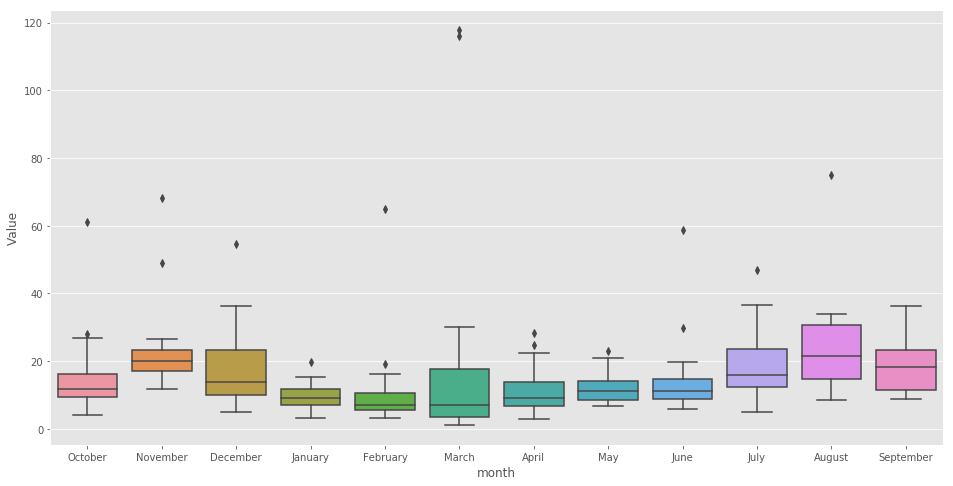

In [40]:
ax = sns.boxplot(x="month", y="Value", data=merge)

In [190]:
#merge = merge.drop(merge[merge.Value > 140].index)

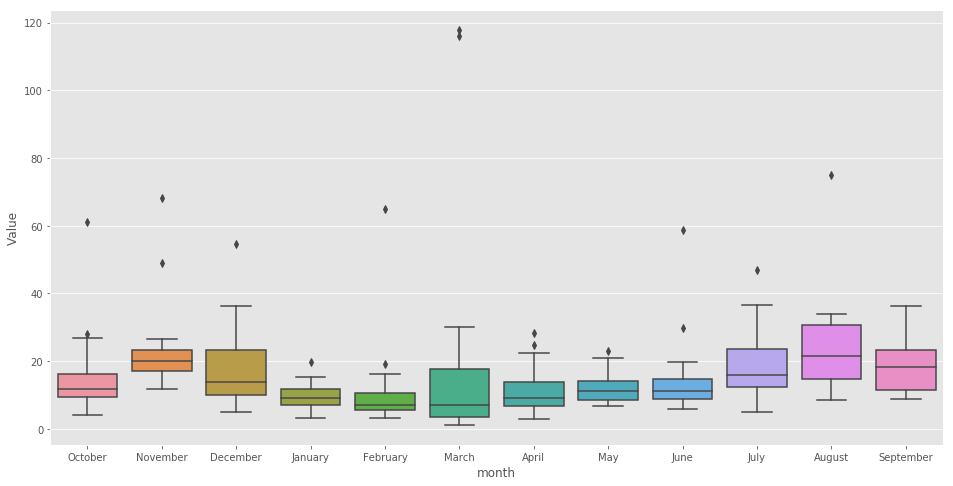

In [191]:
ax = sns.boxplot(x="month", y="Value", data=merge)

In [20]:
merge['month_cat'] = merge.month.astype("category").cat.codes

In [17]:
merge.head()

,Date,TEMP,DIR,SPD,DEWP,HUM,Day,Value
0,2017-10-15,77.0,200.000000,2.0,65.700000,68.000000,96,7.784710
1,2017-10-16,81.5,0.000000,0.0,66.200000,59.000000,97,6.511036
2,2017-10-17,78.3,113.333333,2.0,67.466667,69.666667,98,4.557446
3,2017-10-18,72.3,0.000000,0.0,68.000000,86.000000,99,8.152256
4,2017-10-19,73.4,70.000000,2.5,67.300000,81.000000,100,6.008917


# Convert TEMP and DEWP from F to C

In [18]:
# Formula to convert F to C is: [°C] = ([°F] - 32) × 5/9
merge['TEMP'] = (merge.TEMP - 32) * 5.0/9.0
# Formula to convert F to C is: [°C] = ([°F] - 32) × 5/9
merge['DEWP'] = (merge.DEWP - 32) * 5.0/9.0


# Convert SPD from Mph to Kph

In [19]:
# 1 mph = 1.60934 kph
merge['SPD'] = merge.SPD * 1.60934


# Convert DEWP to HUM

In [20]:
import math

#merge['HUM'] = 100*(np.exp((17.625 * merge['DEWP'])/(243.04 + merge['DEWP']))/np.exp((17.625 * merge['TEMP'])/(243.04 + merge['TEMP'])))


In [21]:
merge = merge.rename(columns={"month_cat": "MONTH"})

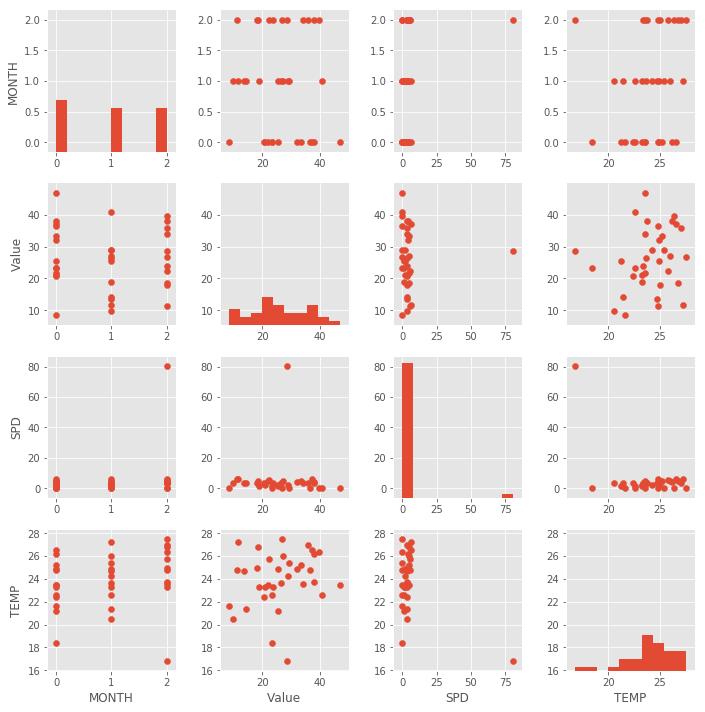

In [78]:
import seaborn as sns
g = sns.PairGrid(merge, vars=["MONTH", "Value","SPD", "TEMP"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

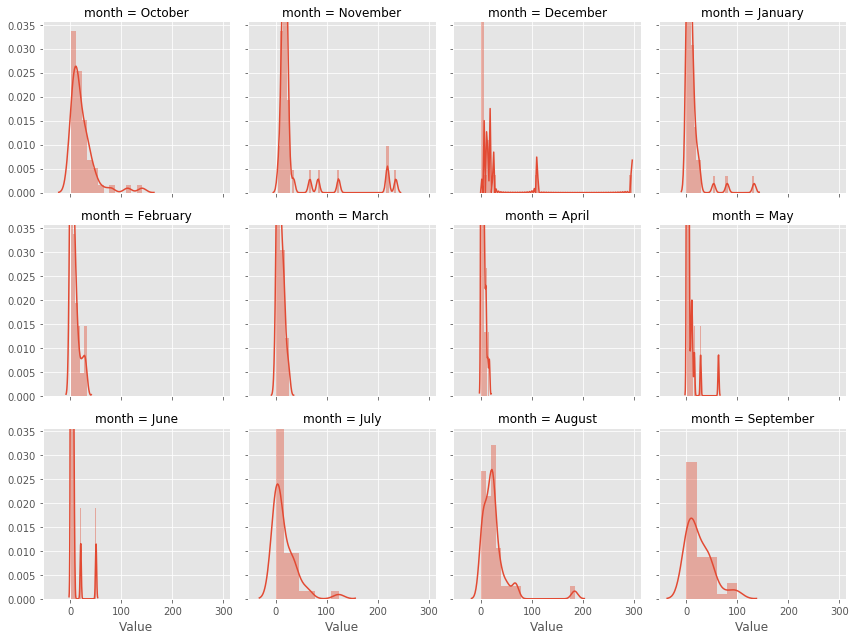

In [202]:
g = sns.FacetGrid(merge, col='month', col_wrap=4)
g.map(sns.distplot, "Value")
plt.show()

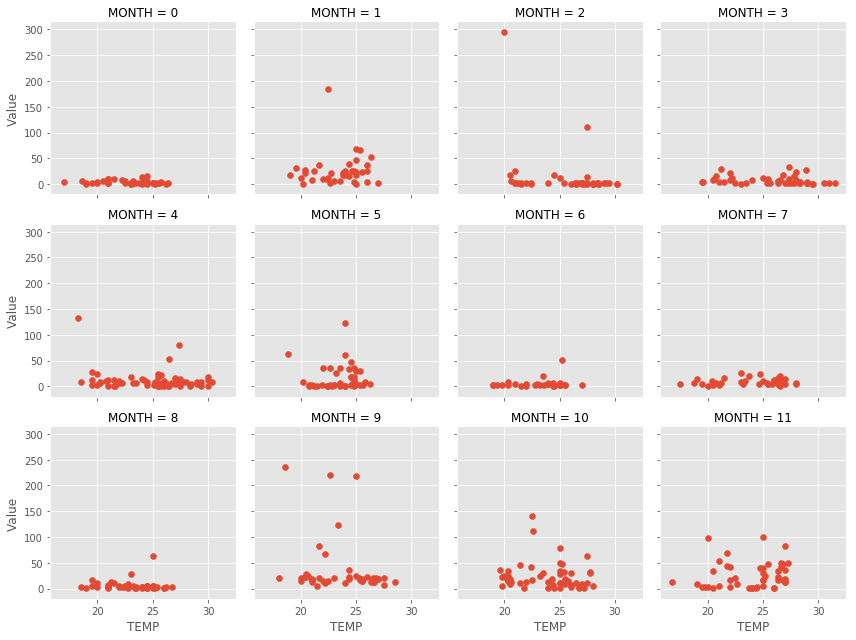

In [204]:
g = sns.FacetGrid(merge, col='MONTH', col_wrap=4)
g.map(plt.scatter, "TEMP","Value")
plt.show()

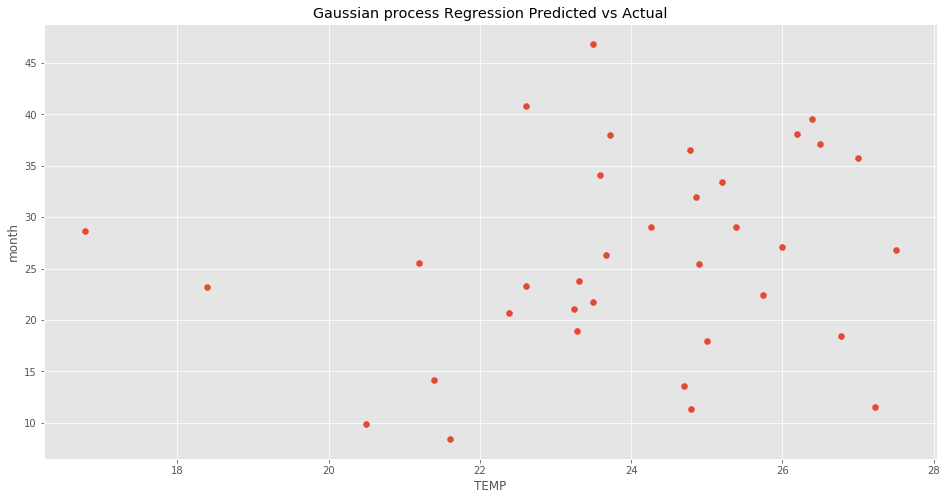

In [66]:
plt.scatter(merge.TEMP, merge.Value)
plt.xlabel('TEMP')
plt.ylabel('month')
plt.title('Gaussian process Regression Predicted vs Actual')
plt.show()

In [92]:
merge.corr()

,TEMP,DIR,SPD,DEWP,HUM,Value,MONTH
TEMP,1.000000,0.232262,0.348949,-0.383229,-0.907506,-0.141137,-0.046313
DIR,0.232262,1.000000,0.679825,-0.223519,-0.276343,0.016227,-0.010118
SPD,0.348949,0.679825,1.000000,-0.231191,-0.367051,-0.003287,-0.036076
DEWP,-0.383229,-0.223519,-0.231191,1.000000,0.716986,0.080116,0.097115
HUM,-0.907506,-0.276343,-0.367051,0.716986,1.000000,0.139616,0.067741
Value,-0.141137,0.016227,-0.003287,0.080116,0.139616,1.000000,0.059845
MONTH,-0.046313,-0.010118,-0.036076,0.097115,0.067741,0.059845,1.000000


In [209]:
 merge.skew()

TEMP                     -0.069521
DEWP                     15.779768
Relative Humidity (%)    -0.050483
SPD                       9.175844
DIR                       0.047420
Hour                      0.172330
Value                     5.217001
MONTH                     0.015367
HUM                      22.653110
dtype: float64

In [210]:
merge.kurt()

TEMP                      -0.611076
DEWP                     326.386685
Relative Humidity (%)     -0.556087
SPD                      152.238003
DIR                       -1.101654
Hour                      -1.112595
Value                     35.854905
MONTH                     -1.268299
HUM                      521.928325
dtype: float64

In [211]:
print merge['TEMP'].var()

7.83025086079


In [212]:
print merge['Relative Humidity (%)'].var()

227.804366797


In [22]:
merge.head()

,Date,TEMP,DIR,SPD,DEWP,HUM,Day,Value
0,2017-10-15,25.000000,200.000000,3.21868,18.722222,68.000000,96,7.784710
1,2017-10-16,27.500000,0.000000,0.00000,19.000000,59.000000,97,6.511036
2,2017-10-17,25.722222,113.333333,3.21868,19.703704,69.666667,98,4.557446
3,2017-10-18,22.388889,0.000000,0.00000,20.000000,86.000000,99,8.152256
4,2017-10-19,23.000000,70.000000,4.02335,19.611111,81.000000,100,6.008917


In [220]:
#merge.to_csv('E:/RESEAERCH/FEEDS/BUGOLBI/mergeH.csv',index = True)

In [218]:
b.head()

,Hour,Date,Value
0,1,2017-08-28 18:00:00,89.550000
1,2,2017-08-29 06:00:00,52.677885
2,3,2017-08-29 07:00:00,24.024222
3,4,2017-08-29 08:00:00,22.683818
4,5,2017-08-29 09:00:00,28.593860


In [216]:
#df = df.drop(['Date','day_week','Month','month'],axis=1)

# Addding index column

In [177]:

#df =df.reset_index()

In [227]:
foo2 =r'E:/RESEAERCH/FEEDS/mulago/feedsD.csv'

c = pd.read_csv(foo2, parse_dates = ['Date'])

# Split into Training and Test Data

In [228]:
c.describe()

,Day,Value
count,327.000000,327.000000
mean,164.000000,27.403589
std,94.540996,63.727832
min,1.000000,1.591087
25%,82.500000,10.476537
50%,164.000000,13.390817
75%,245.500000,18.239057
max,327.000000,500.000000


In [229]:
import datetime as dt
c['month'] = c['Date'].dt.month_name()

In [230]:
c['month_cat'] = c.month.astype("category").cat.codes

In [231]:
c.head()
#merge.head()

,Day,Date,Value,month,month_cat
0,1,2017-07-30,158.275571,July,5
1,2,2017-07-31,15.358082,July,5
2,3,2017-01-08,18.243723,January,4
3,4,2017-02-08,18.326520,February,3
4,5,2017-03-08,32.022171,March,7


In [232]:
c = c.drop(['Date','month'],axis=1)
#merge = merge.drop(['Date','month','MONTH','DEWP'],axis=1)
#print merge.head()
#print c

In [23]:
merge.head()

,Date,TEMP,DIR,SPD,DEWP,HUM,Day,Value
0,2017-10-15,25.000000,200.000000,3.21868,18.722222,68.000000,96,7.784710
1,2017-10-16,27.500000,0.000000,0.00000,19.000000,59.000000,97,6.511036
2,2017-10-17,25.722222,113.333333,3.21868,19.703704,69.666667,98,4.557446
3,2017-10-18,22.388889,0.000000,0.00000,20.000000,86.000000,99,8.152256
4,2017-10-19,23.000000,70.000000,4.02335,19.611111,81.000000,100,6.008917


In [24]:
#y = c['Value']
y = merge[['HUM','Value']]

In [25]:
#X = c.drop(['Value'], axis=1)
X = merge[['TEMP']]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [27]:
X_train.shape, y_train.shape

((161, 1), (161, 2))

In [28]:
X_test.shape, y_test.shape

((70, 1), (70, 2))

# Implement ML Algorithms

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [30]:
# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
lin_pred = regr.predict(X_test)

linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.33195135100335244

In [93]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

('Coefficients: \n', array([[-5.1228333],
       [-1.0343561]]))
Root mean squared error: 11.58
Mean absolute error: 6.38
R-squared: 0.41


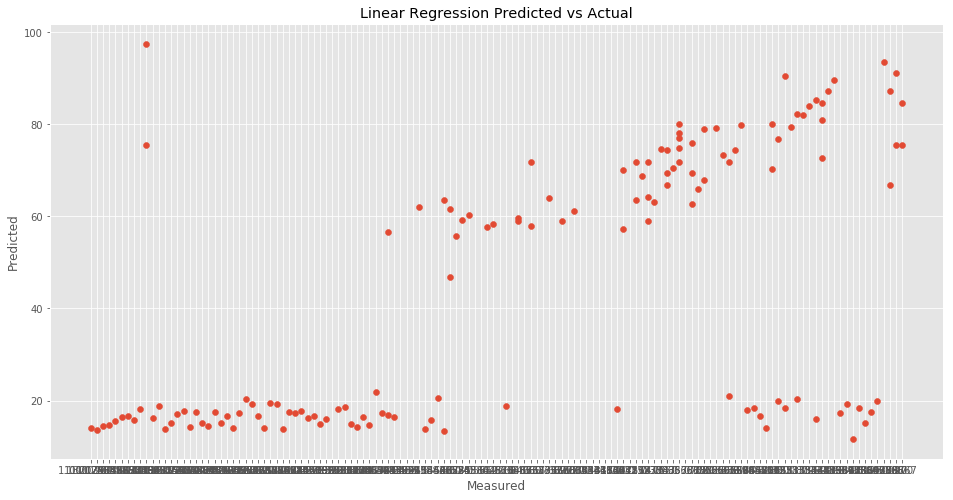

In [31]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

# Neural Network Regression

In [32]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
#mlp = GaussianProcessRegressor()
mlp = MLPRegressor()

In [33]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

C:\Users\Wabinyai\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [34]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

-0.54936908542848883

In [98]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [99]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 17.15
Mean absolute error: 12.04
R-squared: -0.57


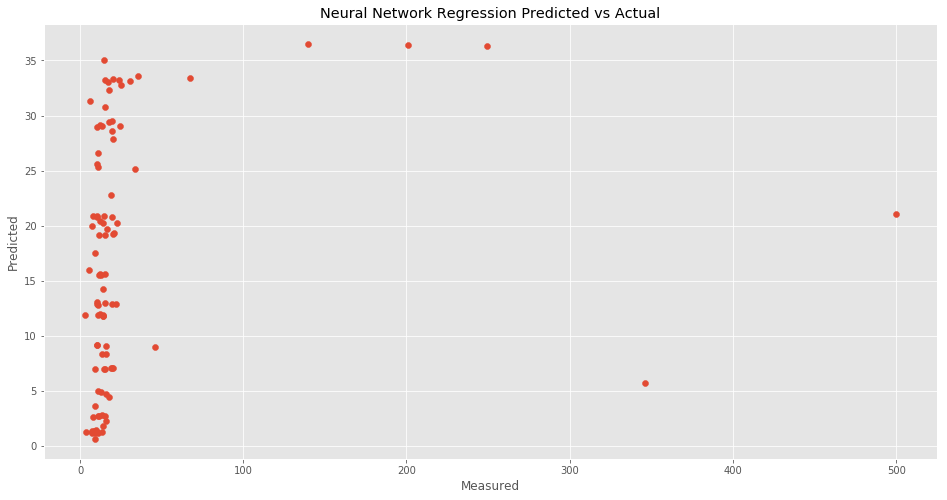

In [258]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

# Gaussian Process Regressor

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn import model_selection

# Create MLPRegressor object
gpr = GaussianProcessRegressor()

In [113]:
# Train the model using the training sets
gpr.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [114]:
# Score the model
GP_regression_score = gpr.score(X_test, y_test)
GP_regression_score

0.33179792917865014

In [252]:
# Make predictions using the testing set
gpr_pred = gpr.predict(X_test)

In [115]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, gpr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, gpr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, gpr_pred))

Root mean squared error: 21.36
Mean absolute error: 13.79
R-squared: -0.90


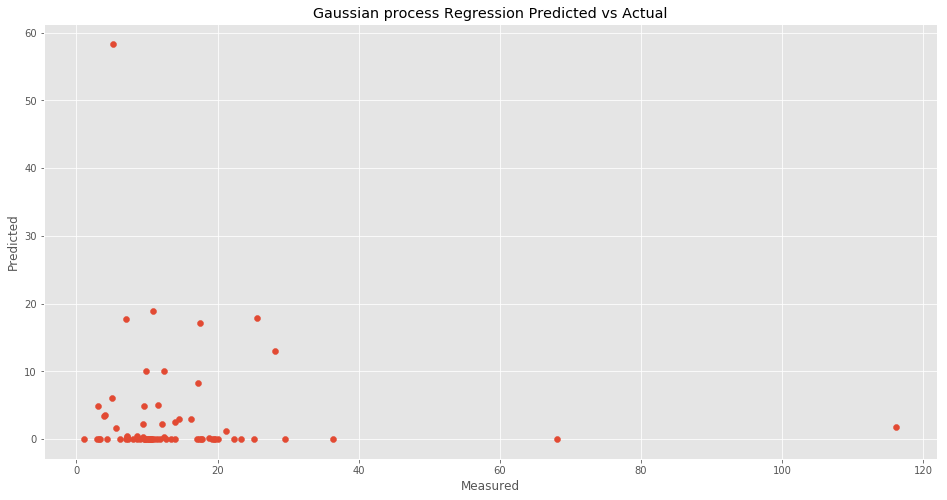

In [116]:
plt.scatter(y_test, gpr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Gaussian process Regression Predicted vs Actual')
plt.show()

# Lasso

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [50]:
lasso.fit(X_train, y_train)

ValueError: shapes (1,) and (2,) not aligned: 1 (dim 0) != 2 (dim 0)

In [51]:
# Score the model
lasso_score = lasso.score(X_test, y_test)
lasso_score

ValueError: shapes (70,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [52]:
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

ValueError: shapes (70,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [266]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lasso_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lasso_pred))

Root mean squared error: 62.63
Mean absolute error: 30.28
R-squared: 0.11


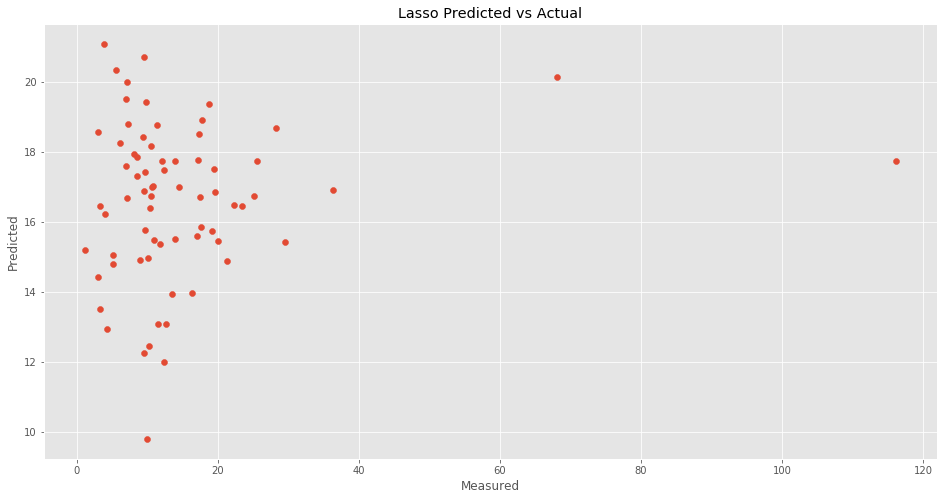

In [122]:
plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

# Decision Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [36]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [37]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.047312601103166901

In [118]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [119]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 13.83
Mean absolute error: 7.19
R-squared: 0.17


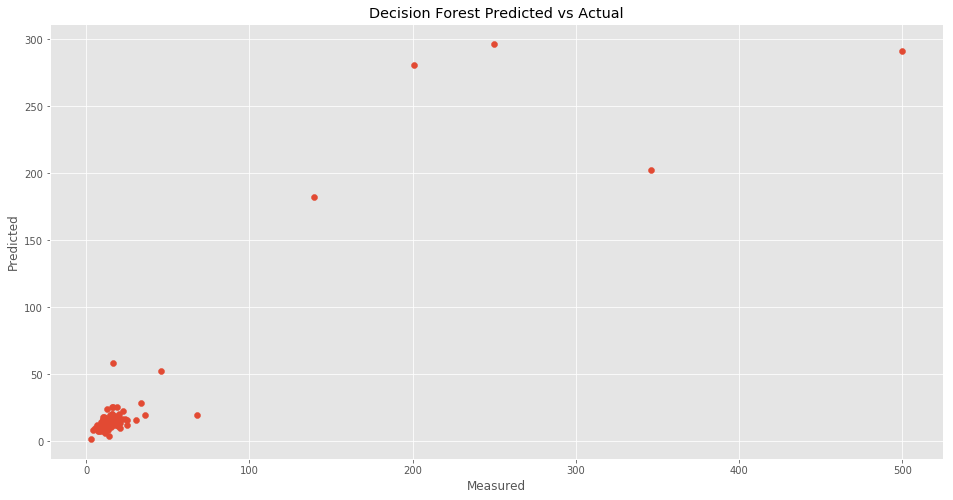

In [118]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

# Extra Trees Regression

In [120]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [121]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [122]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.00019774843799038274

In [123]:
extratree_pred = extra_tree.predict(X_test)

In [124]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, extratree_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, extratree_pred))

Root mean squared error: 14.17
Mean absolute error: 7.43
R-squared: 0.13


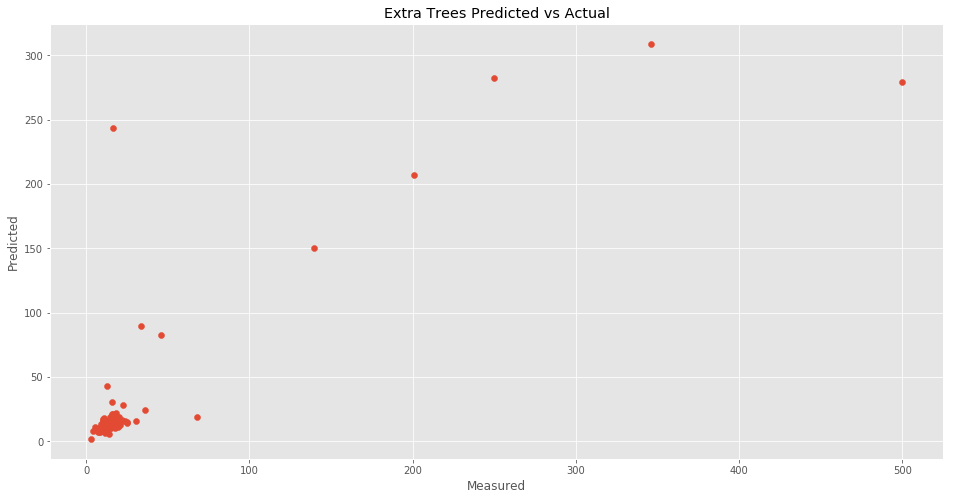

In [123]:
plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

# Elastic net

In [69]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()

In [70]:
elasticnet.fit(X_train, y_train)

ValueError: shapes (1,) and (4,) not aligned: 1 (dim 0) != 4 (dim 0)

In [274]:
elasticnet_score = elasticnet.score(X_test, y_test)
elasticnet_score

0.11249723296861479

In [275]:
elasticnet_pred = elasticnet.predict(X_test)

In [276]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, elasticnet_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, elasticnet_pred))

Root mean squared error: 62.63
Mean absolute error: 30.29
R-squared: 0.11


# XGBOOST

In [124]:
from xgboost.sklearn import XGBRegressor

#Fitting XGB regressor 
xboost = XGBRegressor(n_estimators=200)

C:\Users\Wabinyai\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [125]:
xboost.fit(X_train, y_train)

ValueError: DataFrame for label cannot have multiple columns

In [285]:
xgb_score = xboost.score(X_test, y_test)
xgb_score

0.34936123644551975

In [286]:
#Predict 
xboost_pred = xboost.predict(X_test)

In [288]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Root mean squared error: 53.63


In [289]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test,  xboost_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test,  xboost_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test,  xboost_pred))

Root mean squared error: 53.63
Mean absolute error: 12.39
R-squared: 0.35


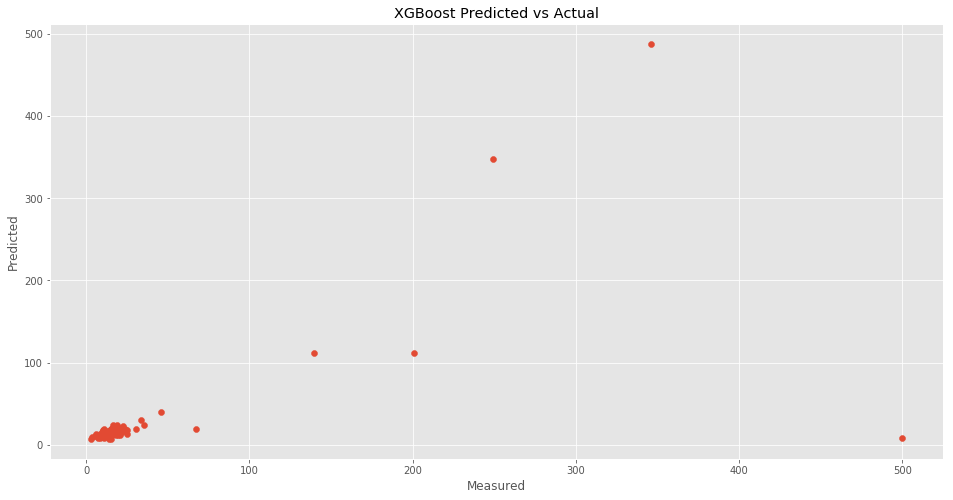

In [293]:
plt.scatter(y_test, xboost_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
plt.show()

In [277]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("ElasticNet regression score: ", elasticnet_score)
print("Decision forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print ("Gaussian Regression process", GP_regression_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("ElasticNet RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
print("Decision forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
print ("Gaussian Regression process:%.2f"
      %sqrt(mean_squared_error(y_test, gpr_pred)))

Scores:
('Linear regression score: ', 0.11166048901498582)
('Neural network regression score: ', -0.0039539147379399342)
('Lasso regression score: ', 0.11261628569018634)
('ElasticNet regression score: ', 0.11249723296861479)
('Decision forest score: ', 0.81415155447380427)
('Extra Trees score: ', 0.74203519981119515)
('Gaussian Regression process', 0.40896256710166989)


RMSE:
Linear regression RMSE: 62.66
Neural network RMSE: 66.62
Lasso RMSE: 62.63
ElasticNet RMSE: 62.63


NameError: name 'regr_rf_pred' is not defined

# Linear Regression PM 2.5 and METROLOGICAL

In [130]:
merge.corr()

,TEMP,DEWP,Relative Humidity (%),SPD,DIR,Hour,Value,MONTH,HUM
TEMP,1.000000,-0.372964,-0.919925,0.327476,0.229076,-0.125736,-0.342973,-0.010525,-0.919256
DEWP,-0.372964,1.000000,0.683758,-0.166298,-0.245575,0.064264,0.156979,-0.011728,0.685512
Relative Humidity (%),-0.919925,0.683758,1.000000,-0.328537,-0.270558,0.104807,0.338330,-0.000587,0.999782
SPD,0.327476,-0.166298,-0.328537,1.000000,0.594117,-0.003744,-0.286761,-0.066959,-0.329216
DIR,0.229076,-0.245575,-0.270558,0.594117,1.000000,-0.123327,-0.190411,-0.033214,-0.270157
Hour,-0.125736,0.064264,0.104807,-0.003744,-0.123327,1.000000,-0.071584,-0.080535,0.104093
Value,-0.342973,0.156979,0.338330,-0.286761,-0.190411,-0.071584,1.000000,0.079833,0.338338
MONTH,-0.010525,-0.011728,-0.000587,-0.066959,-0.033214,-0.080535,0.079833,1.000000,-0.001498
HUM,-0.919256,0.685512,0.999782,-0.329216,-0.270157,0.104093,0.338338,-0.001498,1.000000


In [29]:
#merge.to_csv('E:/RESEAERCH/FEEDS/mulago/merge.csv',index = True)

In [30]:
merge.describe()

,TEMP,DEWP,Relative Humidity (%),SPD,DIR,Hour,Value,MONTH,HUM
count,512.000000,511.000000,511.000000,512.000000,512.000000,512.000000,512.000000,512.000000,511.000000
mean,24.397244,18.159491,69.330724,3.929053,142.207031,2488.466797,12.210352,5.119141,69.755976
std,2.635286,1.595449,14.250085,3.025696,103.958878,1231.449568,23.567268,3.281250,14.264816
min,17.277778,11.277778,31.000000,0.000000,0.000000,345.000000,0.670000,0.000000,31.507488
25%,22.500000,17.555556,60.000000,0.000000,0.000000,1494.250000,6.645804,2.000000,60.764770
50%,24.777778,18.500000,69.000000,3.218680,160.000000,2472.500000,9.399982,5.000000,69.163192
75%,26.055556,19.111111,79.500000,6.437360,180.000000,3542.250000,13.283163,8.000000,79.912146
max,31.000000,21.777778,100.000000,12.874720,360.000000,4594.000000,500.000000,11.000000,100.000000


In [33]:
merge = merge.drop(merge[merge.SPD == 0].index)

In [34]:
merge.describe()

,TEMP,DEWP,Relative Humidity (%),SPD,DIR,Hour,Value,MONTH,HUM
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,24.974269,17.951901,66.123684,5.293882,191.605263,2443.994737,11.043035,4.973684,66.547553
std,2.480834,1.688367,13.629201,2.258102,71.285238,1219.513626,25.798324,3.250223,13.647754
min,18.000000,11.277778,31.000000,3.218680,20.000000,345.000000,0.670000,0.000000,31.507488
25%,23.500000,17.277778,57.000000,3.218680,160.000000,1499.500000,6.267602,2.000000,57.820619
50%,25.222222,18.277778,65.000000,4.828020,180.000000,2279.500000,8.596680,4.500000,65.769771
75%,26.500000,19.000000,74.000000,6.437360,255.000000,3549.750000,11.845682,8.000000,74.648375
max,31.000000,21.500000,100.000000,12.874720,360.000000,4594.000000,500.000000,11.000000,100.000000


In [35]:
merge.corr()

,TEMP,DEWP,Relative Humidity (%),SPD,DIR,Hour,Value,MONTH,HUM
TEMP,1.000000,-0.400016,-0.910078,0.078577,-0.150564,-0.155997,-0.057139,0.011496,-0.909200
DEWP,-0.400016,1.000000,0.721324,0.003480,-0.128092,0.072305,-0.009105,-0.057555,0.723207
Relative Humidity (%),-0.910078,0.721324,1.000000,-0.064103,0.079095,0.119551,0.031705,-0.042574,0.999760
SPD,0.078577,0.003480,-0.064103,1.000000,-0.060582,0.088153,-0.074222,-0.024361,-0.065756
DIR,-0.150564,-0.128092,0.079095,-0.060582,1.000000,-0.138258,0.018465,0.049265,0.079449
Hour,-0.155997,0.072305,0.119551,0.088153,-0.138258,1.000000,-0.103229,-0.086971,0.118332
Value,-0.057139,-0.009105,0.031705,-0.074222,0.018465,-0.103229,1.000000,0.102786,0.031704
MONTH,0.011496,-0.057555,-0.042574,-0.024361,0.049265,-0.086971,0.102786,1.000000,-0.044157
HUM,-0.909200,0.723207,0.999760,-0.065756,0.079449,0.118332,0.031704,-0.044157,1.000000
